# Additional Standardizations

## Table of Contents

    1. Notebook Prep
    
    2. Add Columns to Obtain Standardized Education Ratios

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Display graphs inline

%matplotlib inline

In [3]:
# Import combined births and finances data set

df = pd.read_csv(r'D:\Achievement 6\02 Data\Prepared Data\births_finances_combined.csv', index_col = False)

In [2]:
# Import restandardized set

rs = pd.read_csv(r'D:\Achievement 6\02 Data\Prepared Data\restandardized.csv', index_col = False)

### 2. Add Columns to Obtain Standardized Education Ratio

In [6]:
# Drop rows of unknown education

df = df[df['education_code'] != -9]

df

,Unnamed: 0,state,year,education_level,education_code,number_of_births,avg_mother_age,avg_birth_weight_grams,ref_year,enrolled,...,instruction_expenditure,support_services_expenditure,other_expenditure,capital_outlay_expenditure,total_expenditure_per_student,instruction_expenditure_per_student,support_expenditure_per_student,7yr_avg_total_per_student,7yr_avg_instruction_per_student,7yr_avg_support_per_student
1,1,Alabama,2016,8th grade or less,1,2240,28,3174.90,2001,728532.0,...,2656393,1374265,426481.0,540284,6.981224,3.646227,1.886348,6.810115,3.563961,1.870747
2,2,Alabama,2016,9th through 12th grade with no diploma,2,7093,24,3080.60,2007,743273.0,...,3653466,2174210,546077.0,687816,9.682121,4.915376,2.925184,9.337717,4.740090,2.793218
3,3,Alabama,2016,High school graduate or GED completed,3,18061,25,3138.95,2007,743273.0,...,3653466,2174210,546077.0,687816,9.682121,4.915376,2.925184,9.337717,4.740090,2.793218
4,4,Alabama,2016,"Some college credit, but not a degree",4,12969,27,3187.00,2005,729342.0,...,3053380,1744013,462605.0,511944,8.095878,4.186486,2.391214,8.433971,4.349030,2.482999
5,5,Alabama,2016,"Associate degree (AA, AS)",5,4687,29,3237.85,2003,727900.0,...,2817111,1521462,424662.0,432279,7.279753,3.870190,2.090207,7.518008,3.907978,2.136339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,2745,Wyoming,2021,"Some college credit, but not a degree",4,1491,27,3175.75,2010,87379.0,...,787627,504838,49289.0,340678,19.411724,9.013916,5.777567,18.305009,8.794587,5.652712
2746,2746,Wyoming,2021,"Associate degree (AA, AS)",5,760,29,3195.90,2008,85991.0,...,703831,449989,43352.0,309892,17.645161,8.184938,5.232978,16.693818,7.943925,5.094818
2747,2747,Wyoming,2021,"Bachelor's degree (BA, AB, BS)",6,1258,31,3237.15,2006,86155.0,...,571127,362807,34310.0,168214,13.307724,6.629064,4.211096,14.325164,6.900355,4.398605
2748,2748,Wyoming,2021,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",7,471,33,3201.80,2004,86925.0,...,483989,303976,28257.0,126574,10.974012,5.567892,3.496992,11.747237,5.939907,3.707659


In [7]:
# Add education_multiplier column

df['education_multiplier'] = df['education_code'] * df['number_of_births']

df

C:\Users\PC Planet\AppData\Local\Temp\ipykernel_2236\3926236005.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education_multiplier'] = df['education_code'] * df['number_of_births']


,Unnamed: 0,state,year,education_level,education_code,number_of_births,avg_mother_age,avg_birth_weight_grams,ref_year,enrolled,...,support_services_expenditure,other_expenditure,capital_outlay_expenditure,total_expenditure_per_student,instruction_expenditure_per_student,support_expenditure_per_student,7yr_avg_total_per_student,7yr_avg_instruction_per_student,7yr_avg_support_per_student,education_multiplier
1,1,Alabama,2016,8th grade or less,1,2240,28,3174.90,2001,728532.0,...,1374265,426481.0,540284,6.981224,3.646227,1.886348,6.810115,3.563961,1.870747,2240
2,2,Alabama,2016,9th through 12th grade with no diploma,2,7093,24,3080.60,2007,743273.0,...,2174210,546077.0,687816,9.682121,4.915376,2.925184,9.337717,4.740090,2.793218,14186
3,3,Alabama,2016,High school graduate or GED completed,3,18061,25,3138.95,2007,743273.0,...,2174210,546077.0,687816,9.682121,4.915376,2.925184,9.337717,4.740090,2.793218,54183
4,4,Alabama,2016,"Some college credit, but not a degree",4,12969,27,3187.00,2005,729342.0,...,1744013,462605.0,511944,8.095878,4.186486,2.391214,8.433971,4.349030,2.482999,51876
5,5,Alabama,2016,"Associate degree (AA, AS)",5,4687,29,3237.85,2003,727900.0,...,1521462,424662.0,432279,7.279753,3.870190,2.090207,7.518008,3.907978,2.136339,23435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,2745,Wyoming,2021,"Some college credit, but not a degree",4,1491,27,3175.75,2010,87379.0,...,504838,49289.0,340678,19.411724,9.013916,5.777567,18.305009,8.794587,5.652712,5964
2746,2746,Wyoming,2021,"Associate degree (AA, AS)",5,760,29,3195.90,2008,85991.0,...,449989,43352.0,309892,17.645161,8.184938,5.232978,16.693818,7.943925,5.094818,3800
2747,2747,Wyoming,2021,"Bachelor's degree (BA, AB, BS)",6,1258,31,3237.15,2006,86155.0,...,362807,34310.0,168214,13.307724,6.629064,4.211096,14.325164,6.900355,4.398605,7548
2748,2748,Wyoming,2021,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",7,471,33,3201.80,2004,86925.0,...,303976,28257.0,126574,10.974012,5.567892,3.496992,11.747237,5.939907,3.707659,3297


In [8]:
df = df

In [10]:
# Create aggregation of births by state and year

total = df.groupby(['state', 'year'])['number_of_births'].sum()

total

state    year
Alabama  2016    59030
         2017    58794
         2018    57649
         2019    58517
         2020    57568
                 ...  
Wyoming  2017     6853
         2018     6474
         2019     6506
         2020     6070
         2021     6156
Name: number_of_births, Length: 306, dtype: int64

In [12]:
# Merge aggregation onto dataframe

df_merged = df.merge(total, on = ['state', 'year'])

df_merged


,Unnamed: 0,state,year,education_level,education_code,number_of_births_x,avg_mother_age,avg_birth_weight_grams,ref_year,enrolled,...,other_expenditure,capital_outlay_expenditure,total_expenditure_per_student,instruction_expenditure_per_student,support_expenditure_per_student,7yr_avg_total_per_student,7yr_avg_instruction_per_student,7yr_avg_support_per_student,education_multiplier,number_of_births_y
0,1,Alabama,2016,8th grade or less,1,2240,28,3174.90,2001,728532.0,...,426481.0,540284,6.981224,3.646227,1.886348,6.810115,3.563961,1.870747,2240,59030
1,2,Alabama,2016,9th through 12th grade with no diploma,2,7093,24,3080.60,2007,743273.0,...,546077.0,687816,9.682121,4.915376,2.925184,9.337717,4.740090,2.793218,14186,59030
2,3,Alabama,2016,High school graduate or GED completed,3,18061,25,3138.95,2007,743273.0,...,546077.0,687816,9.682121,4.915376,2.925184,9.337717,4.740090,2.793218,54183,59030
3,4,Alabama,2016,"Some college credit, but not a degree",4,12969,27,3187.00,2005,729342.0,...,462605.0,511944,8.095878,4.186486,2.391214,8.433971,4.349030,2.482999,51876,59030
4,5,Alabama,2016,"Associate degree (AA, AS)",5,4687,29,3237.85,2003,727900.0,...,424662.0,432279,7.279753,3.870190,2.090207,7.518008,3.907978,2.136339,23435,59030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,2745,Wyoming,2021,"Some college credit, but not a degree",4,1491,27,3175.75,2010,87379.0,...,49289.0,340678,19.411724,9.013916,5.777567,18.305009,8.794587,5.652712,5964,6156
2444,2746,Wyoming,2021,"Associate degree (AA, AS)",5,760,29,3195.90,2008,85991.0,...,43352.0,309892,17.645161,8.184938,5.232978,16.693818,7.943925,5.094818,3800,6156
2445,2747,Wyoming,2021,"Bachelor's degree (BA, AB, BS)",6,1258,31,3237.15,2006,86155.0,...,34310.0,168214,13.307724,6.629064,4.211096,14.325164,6.900355,4.398605,7548,6156
2446,2748,Wyoming,2021,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",7,471,33,3201.80,2004,86925.0,...,28257.0,126574,10.974012,5.567892,3.496992,11.747237,5.939907,3.707659,3297,6156


In [13]:
# Create aggregation of education_multiplier

edu_sum = df_merged.groupby(['state', 'year'])['education_multiplier'].sum()

edu_sum

state    year
Alabama  2016    235680
         2017    236379
         2018    233059
         2019    235191
         2020    232663
                  ...  
Wyoming  2017     29641
         2018     28003
         2019     28427
         2020     26412
         2021     27197
Name: education_multiplier, Length: 306, dtype: int64

In [15]:
# Merge aggregation onto dataframe

df_merged2 = df_merged.merge(edu_sum, on = ['state', 'year'])

df_merged2

,Unnamed: 0,state,year,education_level,education_code,number_of_births_x,avg_mother_age,avg_birth_weight_grams,ref_year,enrolled,...,capital_outlay_expenditure,total_expenditure_per_student,instruction_expenditure_per_student,support_expenditure_per_student,7yr_avg_total_per_student,7yr_avg_instruction_per_student,7yr_avg_support_per_student,education_multiplier_x,number_of_births_y,education_multiplier_y
0,1,Alabama,2016,8th grade or less,1,2240,28,3174.90,2001,728532.0,...,540284,6.981224,3.646227,1.886348,6.810115,3.563961,1.870747,2240,59030,235680
1,2,Alabama,2016,9th through 12th grade with no diploma,2,7093,24,3080.60,2007,743273.0,...,687816,9.682121,4.915376,2.925184,9.337717,4.740090,2.793218,14186,59030,235680
2,3,Alabama,2016,High school graduate or GED completed,3,18061,25,3138.95,2007,743273.0,...,687816,9.682121,4.915376,2.925184,9.337717,4.740090,2.793218,54183,59030,235680
3,4,Alabama,2016,"Some college credit, but not a degree",4,12969,27,3187.00,2005,729342.0,...,511944,8.095878,4.186486,2.391214,8.433971,4.349030,2.482999,51876,59030,235680
4,5,Alabama,2016,"Associate degree (AA, AS)",5,4687,29,3237.85,2003,727900.0,...,432279,7.279753,3.870190,2.090207,7.518008,3.907978,2.136339,23435,59030,235680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,2745,Wyoming,2021,"Some college credit, but not a degree",4,1491,27,3175.75,2010,87379.0,...,340678,19.411724,9.013916,5.777567,18.305009,8.794587,5.652712,5964,6156,27197
2444,2746,Wyoming,2021,"Associate degree (AA, AS)",5,760,29,3195.90,2008,85991.0,...,309892,17.645161,8.184938,5.232978,16.693818,7.943925,5.094818,3800,6156,27197
2445,2747,Wyoming,2021,"Bachelor's degree (BA, AB, BS)",6,1258,31,3237.15,2006,86155.0,...,168214,13.307724,6.629064,4.211096,14.325164,6.900355,4.398605,7548,6156,27197
2446,2748,Wyoming,2021,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",7,471,33,3201.80,2004,86925.0,...,126574,10.974012,5.567892,3.496992,11.747237,5.939907,3.707659,3297,6156,27197


In [17]:
# Rename columns

df2 = df_merged2.rename(columns = {'education_multiplier_x':'education_multiplier', 'number_of_births_y':'total_births', 'education_multiplier_y':'education_sum'})

df2

,Unnamed: 0,state,year,education_level,education_code,number_of_births_x,avg_mother_age,avg_birth_weight_grams,ref_year,enrolled,...,capital_outlay_expenditure,total_expenditure_per_student,instruction_expenditure_per_student,support_expenditure_per_student,7yr_avg_total_per_student,7yr_avg_instruction_per_student,7yr_avg_support_per_student,education_multiplier,total_births,education_sum
0,1,Alabama,2016,8th grade or less,1,2240,28,3174.90,2001,728532.0,...,540284,6.981224,3.646227,1.886348,6.810115,3.563961,1.870747,2240,59030,235680
1,2,Alabama,2016,9th through 12th grade with no diploma,2,7093,24,3080.60,2007,743273.0,...,687816,9.682121,4.915376,2.925184,9.337717,4.740090,2.793218,14186,59030,235680
2,3,Alabama,2016,High school graduate or GED completed,3,18061,25,3138.95,2007,743273.0,...,687816,9.682121,4.915376,2.925184,9.337717,4.740090,2.793218,54183,59030,235680
3,4,Alabama,2016,"Some college credit, but not a degree",4,12969,27,3187.00,2005,729342.0,...,511944,8.095878,4.186486,2.391214,8.433971,4.349030,2.482999,51876,59030,235680
4,5,Alabama,2016,"Associate degree (AA, AS)",5,4687,29,3237.85,2003,727900.0,...,432279,7.279753,3.870190,2.090207,7.518008,3.907978,2.136339,23435,59030,235680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,2745,Wyoming,2021,"Some college credit, but not a degree",4,1491,27,3175.75,2010,87379.0,...,340678,19.411724,9.013916,5.777567,18.305009,8.794587,5.652712,5964,6156,27197
2444,2746,Wyoming,2021,"Associate degree (AA, AS)",5,760,29,3195.90,2008,85991.0,...,309892,17.645161,8.184938,5.232978,16.693818,7.943925,5.094818,3800,6156,27197
2445,2747,Wyoming,2021,"Bachelor's degree (BA, AB, BS)",6,1258,31,3237.15,2006,86155.0,...,168214,13.307724,6.629064,4.211096,14.325164,6.900355,4.398605,7548,6156,27197
2446,2748,Wyoming,2021,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",7,471,33,3201.80,2004,86925.0,...,126574,10.974012,5.567892,3.496992,11.747237,5.939907,3.707659,3297,6156,27197


In [18]:
# Calculate new column 'edu_ratio'

df2['edu_ratio'] = df2['education_sum'] / df2['total_births']

df2

,Unnamed: 0,state,year,education_level,education_code,number_of_births_x,avg_mother_age,avg_birth_weight_grams,ref_year,enrolled,...,total_expenditure_per_student,instruction_expenditure_per_student,support_expenditure_per_student,7yr_avg_total_per_student,7yr_avg_instruction_per_student,7yr_avg_support_per_student,education_multiplier,total_births,education_sum,edu_ratio
0,1,Alabama,2016,8th grade or less,1,2240,28,3174.90,2001,728532.0,...,6.981224,3.646227,1.886348,6.810115,3.563961,1.870747,2240,59030,235680,3.992546
1,2,Alabama,2016,9th through 12th grade with no diploma,2,7093,24,3080.60,2007,743273.0,...,9.682121,4.915376,2.925184,9.337717,4.740090,2.793218,14186,59030,235680,3.992546
2,3,Alabama,2016,High school graduate or GED completed,3,18061,25,3138.95,2007,743273.0,...,9.682121,4.915376,2.925184,9.337717,4.740090,2.793218,54183,59030,235680,3.992546
3,4,Alabama,2016,"Some college credit, but not a degree",4,12969,27,3187.00,2005,729342.0,...,8.095878,4.186486,2.391214,8.433971,4.349030,2.482999,51876,59030,235680,3.992546
4,5,Alabama,2016,"Associate degree (AA, AS)",5,4687,29,3237.85,2003,727900.0,...,7.279753,3.870190,2.090207,7.518008,3.907978,2.136339,23435,59030,235680,3.992546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,2745,Wyoming,2021,"Some college credit, but not a degree",4,1491,27,3175.75,2010,87379.0,...,19.411724,9.013916,5.777567,18.305009,8.794587,5.652712,5964,6156,27197,4.417966
2444,2746,Wyoming,2021,"Associate degree (AA, AS)",5,760,29,3195.90,2008,85991.0,...,17.645161,8.184938,5.232978,16.693818,7.943925,5.094818,3800,6156,27197,4.417966
2445,2747,Wyoming,2021,"Bachelor's degree (BA, AB, BS)",6,1258,31,3237.15,2006,86155.0,...,13.307724,6.629064,4.211096,14.325164,6.900355,4.398605,7548,6156,27197,4.417966
2446,2748,Wyoming,2021,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",7,471,33,3201.80,2004,86925.0,...,10.974012,5.567892,3.496992,11.747237,5.939907,3.707659,3297,6156,27197,4.417966


In [19]:
#Calculate new column 'edu_percent'

df2['edu_percent'] = df2['number_of_births_x'] / df2['total_births']

df2

,Unnamed: 0,state,year,education_level,education_code,number_of_births_x,avg_mother_age,avg_birth_weight_grams,ref_year,enrolled,...,instruction_expenditure_per_student,support_expenditure_per_student,7yr_avg_total_per_student,7yr_avg_instruction_per_student,7yr_avg_support_per_student,education_multiplier,total_births,education_sum,edu_ratio,edu_percent
0,1,Alabama,2016,8th grade or less,1,2240,28,3174.90,2001,728532.0,...,3.646227,1.886348,6.810115,3.563961,1.870747,2240,59030,235680,3.992546,0.037947
1,2,Alabama,2016,9th through 12th grade with no diploma,2,7093,24,3080.60,2007,743273.0,...,4.915376,2.925184,9.337717,4.740090,2.793218,14186,59030,235680,3.992546,0.120159
2,3,Alabama,2016,High school graduate or GED completed,3,18061,25,3138.95,2007,743273.0,...,4.915376,2.925184,9.337717,4.740090,2.793218,54183,59030,235680,3.992546,0.305963
3,4,Alabama,2016,"Some college credit, but not a degree",4,12969,27,3187.00,2005,729342.0,...,4.186486,2.391214,8.433971,4.349030,2.482999,51876,59030,235680,3.992546,0.219702
4,5,Alabama,2016,"Associate degree (AA, AS)",5,4687,29,3237.85,2003,727900.0,...,3.870190,2.090207,7.518008,3.907978,2.136339,23435,59030,235680,3.992546,0.079400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,2745,Wyoming,2021,"Some college credit, but not a degree",4,1491,27,3175.75,2010,87379.0,...,9.013916,5.777567,18.305009,8.794587,5.652712,5964,6156,27197,4.417966,0.242203
2444,2746,Wyoming,2021,"Associate degree (AA, AS)",5,760,29,3195.90,2008,85991.0,...,8.184938,5.232978,16.693818,7.943925,5.094818,3800,6156,27197,4.417966,0.123457
2445,2747,Wyoming,2021,"Bachelor's degree (BA, AB, BS)",6,1258,31,3237.15,2006,86155.0,...,6.629064,4.211096,14.325164,6.900355,4.398605,7548,6156,27197,4.417966,0.204353
2446,2748,Wyoming,2021,"Master's degree (MA, MS, MEng, MEd, MSW, MBA)",7,471,33,3201.80,2004,86925.0,...,5.567892,3.496992,11.747237,5.939907,3.707659,3297,6156,27197,4.417966,0.076511


In [20]:
# Export

df2.to_csv(r'D:\Achievement 6\02 Data\Prepared Data\restandardized.csv')

### 3. Regression Analysis

In [6]:
df_avg = rs.groupby(['7yr_avg_total_per_student'])['edu_ratio'].mean()

df_avg

7yr_avg_total_per_student
4.875621     4.486579
5.126646     4.494145
5.354419     4.505876
5.399056     4.040310
5.478390     4.206901
               ...   
20.192894    4.915843
20.681479    4.633322
21.939022    5.013061
23.258446    5.026394
24.896896    5.095446
Name: edu_ratio, Length: 681, dtype: float64

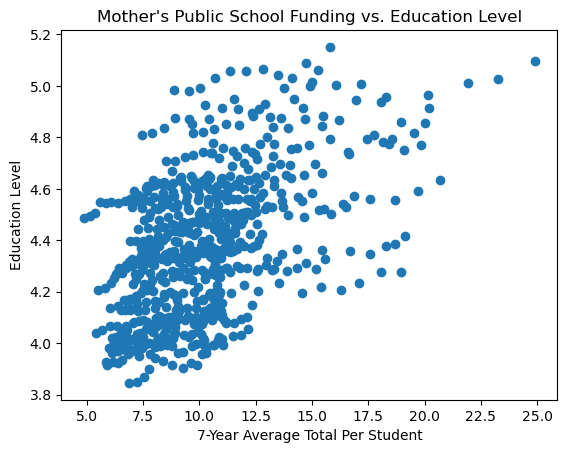

In [7]:
# Scatterplot

df_avg.plot(x = '7yr_avg_total_per_student', y = 'edu_ratio', style = 'o')
plt.title('Mother\'s Public School Funding vs. Education Level')
plt.xlabel('7-Year Average Total Per Student')
plt.ylabel('Education Level')
plt.show()

In [8]:
df_avg = df_avg.reset_index()

df_avg

,7yr_avg_total_per_student,edu_ratio
0,4.875621,4.486579
1,5.126646,4.494145
2,5.354419,4.505876
3,5.399056,4.040310
4,5.478390,4.206901
...,...,...
676,20.192894,4.915843
677,20.681479,4.633322
678,21.939022,5.013061
679,23.258446,5.026394


In [9]:
# Reshape the variables into NumPy arrays

X = df_avg['7yr_avg_total_per_student'].values.reshape(-1,1)
y = df_avg['edu_ratio'].values.reshape(-1,1)

In [10]:
# Split data into a training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [11]:
# Create regression object

regression = LinearRegression()

In [12]:
# Fit the regression object to the training data

regression.fit(X_train, y_train)

LinearRegression()

In [13]:
# Predict y-values

y_predicted = regression.predict(X_test)

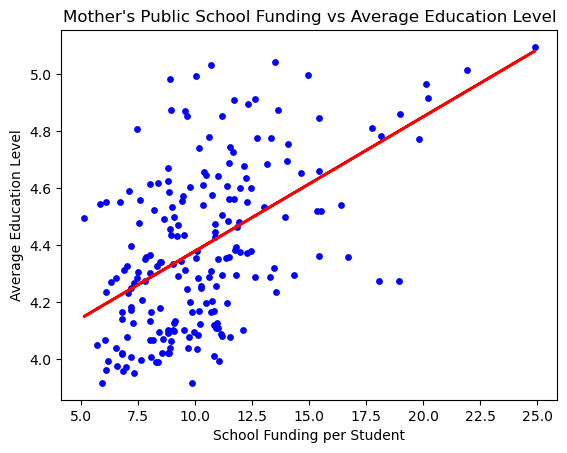

In [14]:
# Plot regression line

plot_test = plt
plot_test.scatter(X_test, y_test, color = 'blue', s =15)
plot_test.plot(X_test, y_predicted, color = 'red', linewidth = 2)
plot_test.title('Mother\'s Public School Funding vs Average Education Level')
plot_test.xlabel('School Funding per Student')
plot_test.ylabel('Average Education Level')
plot_test.show()

In [15]:
# Define Statistic Variables 

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [16]:
# Display Statistic Variables

print('Slope: ', regression.coef_)
print('Mean Squared Error: ', rmse)
print('R2 Score: ', r2)

Slope:  [[0.04714361]]
Mean Squared Error:  0.05973299902691335
R2 Score:  0.26465004155289906
